# Linear Regression

In [1]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("Advertising.csv")
data.head(5)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
data.shape

(200, 4)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


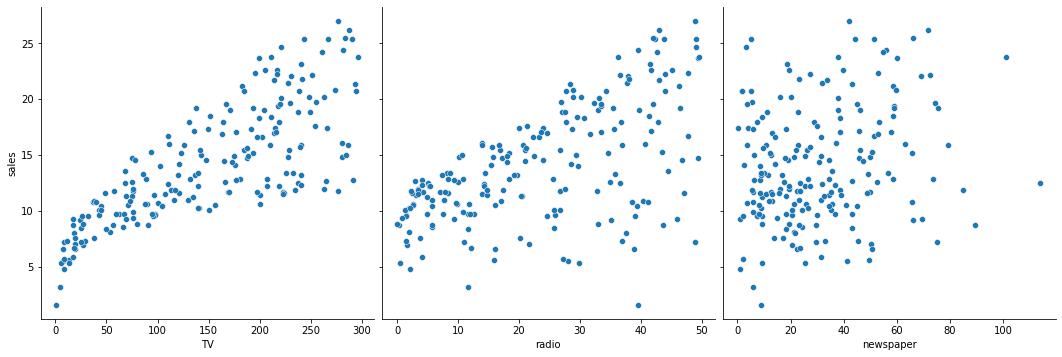

In [5]:
#sns.pairplot(data)# all analysis
sns.pairplot(x_vars=["TV","radio","newspaper"],y_vars=["sales"],data=data,size=5)

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


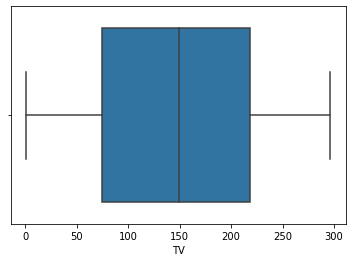

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


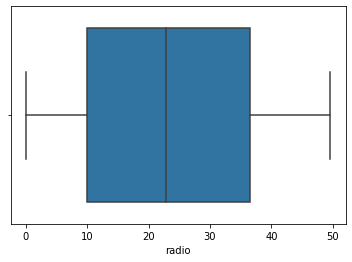

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


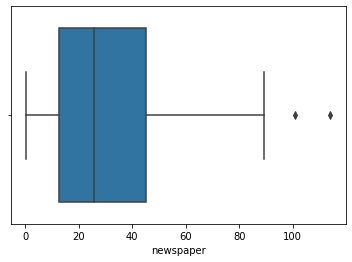

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


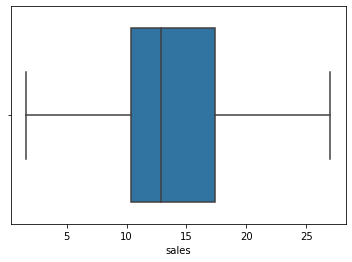

In [6]:
#box plot for all features
for i in data.columns:
    sns.boxplot(data[i])
    plt.show()

In [7]:
# outlier Treatement
from scipy import stats
iqr=stats.iqr(data["newspaper"])
q1=stats.scoreatpercentile(data["newspaper"],25)
q3=stats.scoreatpercentile(data["newspaper"],75)
lowerbound=q1 -(1.5*iqr)
upperbound=q3+(1.5*iqr)
print(lowerbound)
print(upperbound)
outliers=data["newspaper"][((data["newspaper"]<lowerbound) |  (data["newspaper"]>upperbound))]
print('outliers are',outliers)

-35.775000000000006
93.625
outliers are 16     114.0
101    100.9
Name: newspaper, dtype: float64


In [8]:
median = np.median(data["newspaper"])# Replace with median

for i in outliers:
    data["newspaper"] = np.where(data["newspaper"]==i, median, data["newspaper"])


In [9]:
# Simple Linear Regression

# consider one features   

# Tv as feature and sale as a label

In [10]:
# split input and output features

X=data.loc[:,["TV"]]
y=data.loc[:,["sales"]]

In [11]:
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


# split the data for training and Testing



In [31]:
# Scikit learn---------- it contain all machine learning realted libraries

from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=10)



In [32]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(140, 1)
(60, 1)
(140, 1)
(60, 1)


In [33]:
# Build the Model
#process to import the linear regression model
from sklearn.linear_model import LinearRegression

# instantiate the obect

lr=LinearRegression()



In [34]:
# fit the data  or train the data

lr.fit(xtrain,ytrain)

LinearRegression()

In [35]:
# y=mx+c
lr.intercept_

array([7.30826074])

In [36]:
lr.coef_

array([[0.04474675]])

In [37]:
# Sales =  0.048 *[TV]  +  6.917

In [38]:
#training performance
ypredtrain=lr.predict(xtrain)

In [ ]:
#ypredtrain

In [39]:
ypredtrain.shape

(140, 1)

In [40]:
ypredtrain

array([[ 8.17634775],
       [17.41207755],
       [14.6154055 ],
       [16.56188925],
       [14.77201913],
       [17.93113989],
       [17.8013743 ],
       [10.80745682],
       [13.54148342],
       [ 8.71778346],
       [13.63097693],
       [ 9.23684579],
       [11.52340487],
       [11.14305747],
       [13.35802174],
       [16.15021912],
       [10.36893864],
       [ 8.10922762],
       [10.72691267],
       [15.22843601],
       [10.72691267],
       [18.03853209],
       [11.65764513],
       [ 9.54559839],
       [17.47472301],
       [19.07218209],
       [15.47901783],
       [13.47883797],
       [19.89999702],
       [14.00684966],
       [11.80083474],
       [16.44107301],
       [10.67769124],
       [16.86169249],
       [18.66498664],
       [10.4673815 ],
       [14.08739381],
       [17.52394444],
       [18.19067105],
       [20.10583208],
       [10.65084319],
       [ 8.14502502],
       [13.55043278],
       [15.85936523],
       [15.14341718],
       [ 7

In [41]:
from sklearn.metrics import mean_squared_error
print("The Rms value is  training data")
print("----------------")
print(np.sqrt(mean_squared_error(ytrain,ypredtrain)))

The Rms value is  training data
----------------
3.0681028951223004


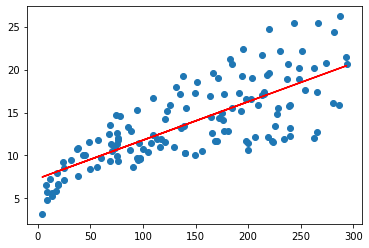

In [42]:
plt.scatter(xtrain,ytrain)
plt.plot(xtrain,ypredtrain,color="red")

In [43]:
# testing the data
ypredtest=lr.predict(xtest)

In [44]:
ypredtest.shape

(60, 1)

In [45]:
from sklearn.metrics import mean_squared_error
print("The Rms value is  test data")
print("----------------")
print(np.sqrt(mean_squared_error(ytest,ypredtest)))

The Rms value is  test data
----------------
3.6508293924109783


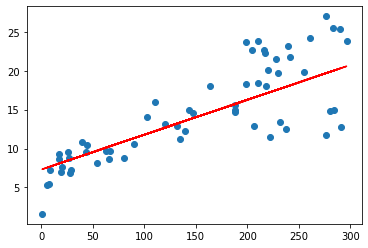

In [46]:
plt.scatter(xtest,ytest)
plt.plot(xtest,ypredtest,color="red")

In [47]:
from sklearn.metrics import r2_score
#r2score close to 1 is a good value
print(r2_score(ytest,ypredtest))

0.6447879078216139


In [ ]:
# End of Simple Linear Regression

# Multiple Linear Regression

In [48]:
data.head(2)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


In [49]:
# splitted i/p and o/p

xnew=data.drop(["sales"],axis=1) #drop the column
ynew=data["sales"]

In [ ]:
xnew.head(3)

In [50]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(xnew,ynew,test_size=0.3,random_state=10)

In [51]:
print(xtrain.shape)
print(xtest.shape)

(140, 3)
(60, 3)


In [52]:
# build a mlr model
from sklearn.linear_model import LinearRegression

mlr=LinearRegression()

mlr.fit(xtrain,ytrain)


LinearRegression()

In [53]:
print("intercept value",mlr.intercept_)
print("coefficent value",mlr.coef_)

intercept value 3.392597098985595
coefficent value [ 0.04304513  0.19298948 -0.00301967]


In [ ]:
# sales= 0.043 [TV]+[0.193][radio]-[0.0038]newspaper+ 3.41

In [54]:
# check the train performance

ypredtraining_mlr=mlr.predict(xtrain)

In [55]:
df=pd.DataFrame({"Actual":ytrain,"predicted":ypredtraining_mlr})
df

,Actual,predicted
119,6.6,7.248166
110,13.4,14.524089
95,16.9,16.360594
167,12.2,13.239294
193,19.6,18.667212
...,...,...
113,15.9,16.358129
64,18.0,17.208495
15,22.4,20.849473
125,10.6,9.345199


In [56]:
from sklearn.metrics import mean_squared_error
print("The Rms value is  training data")
print("----------------")
print(np.sqrt(mean_squared_error(ytrain,ypredtraining_mlr)))

The Rms value is  training data
----------------
1.3332818533291317


In [57]:
from sklearn.metrics import r2_score
#r2score close to 1 is a good value
print(r2_score(ytrain,ypredtraining_mlr))

0.920909492761702


In [58]:
# Test performace

ypredtest_mlr=mlr.predict(xtest)

In [59]:
pd.DataFrame({"Actual":ytest,"predicted":ypredtest_mlr}).head()

,Actual,predicted
59,18.4,18.127313
5,7.2,12.977800
20,18.0,17.978211
198,25.5,23.505852
52,22.6,20.635645


In [60]:
from sklearn.metrics import mean_squared_error
print("The Rms value is  test data")
print("----------------")
print(np.sqrt(mean_squared_error(ytest,ypredtest_mlr)))

The Rms value is  test data
----------------
2.314415304470104


In [61]:
print(r2_score(ytest,ypredtest_mlr))

0.8572463405728885


In [ ]:
# End of Linear regression